In [77]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle;

In [78]:
df = pd.read_csv('cassava.csv')
df.head()

landType            seedSystem croptype          seedType  \
0        Irrigated  Informal Seed System  Cassava   Certified Seeds   
1  Rainfed Lowland    Formal Seed System  Cassava      Hybrid Seeds   
2        Irrigated  Informal Seed System  Cassava   Certified Seeds   
3        Irrigated  Informal Seed System  Cassava  Registered Seeds   
4           Upland    Formal Seed System  Cassava  Registered Seeds   

   harvestArea  prod  
0            5     8  
1            3     8  
2            5     6  
3            5    10  
4            5     5

In [79]:
df.shape

(29273, 6)

### 2. Data Pre-processing
* 2.1 Droppping duplicates

In [80]:
df = df.drop_duplicates()

In [81]:
df.shape

(900, 6)

In [82]:
df.dtypes

landType       object
seedSystem     object
croptype       object
seedType       object
harvestArea     int64
prod            int64
dtype: object

In [83]:
df.drop(['croptype'], axis = 1, inplace = True)
df.drop(['seedSystem'], axis = 1, inplace = True)

In [84]:
df.isnull().sum() 

landType       0
seedType       0
harvestArea    0
prod           0
dtype: int64

<AxesSubplot:>

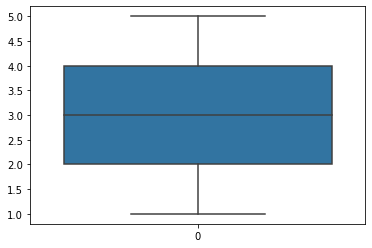

In [85]:
sns.boxplot(df['harvestArea'])

In [86]:
def removeOutliers(df,col):
        q3 = df[col].quantile(0.75);
        q1 = df[col].quantile(0.25);
        iqr = q3 - q1;
        
        max_ = q3 + (iqr * 1.5);
        min_ = q1 - (iqr * 1.5);
        
        df.loc[df[col] >= max_,col] = max_;
        df.loc[df[col] <= min_,col] = min_;

In [87]:
removeOutliers(df,'harvestArea')

<AxesSubplot:>

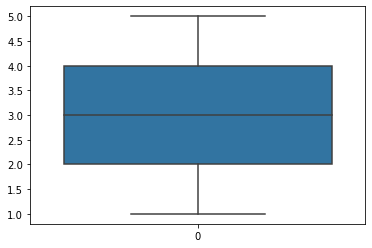

In [88]:
sns.boxplot(df['harvestArea'])

<AxesSubplot:>

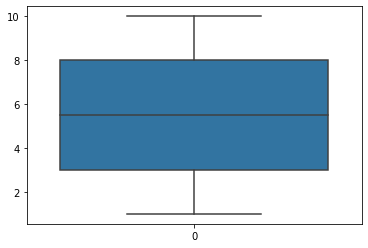

In [89]:
sns.boxplot(df['prod'])

In [90]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder();

df_new = df.copy();
df_new

landType          seedType  harvestArea  prod
0           Irrigated   Certified Seeds            5     8
1     Rainfed Lowland      Hybrid Seeds            3     8
2           Irrigated   Certified Seeds            5     6
3           Irrigated  Registered Seeds            5    10
4              Upland  Registered Seeds            5     5
...               ...               ...          ...   ...
6471           Upland  Registered Seeds            4     3
6580  Rainfed Lowland  Registered Seeds            5     8
6743           Upland   Certified Seeds            2     1
7619  Rainfed Lowland   Certified Seeds            2     3
7621  Rainfed Lowland   Certified Seeds            2     5

[900 rows x 4 columns]

In [91]:
df['landType'].unique()

array(['Irrigated', 'Rainfed Lowland', 'Upland'], dtype=object)

In [92]:
# df['seedSystem'].unique()

In [93]:
df['seedType'].unique()

array(['Certified Seeds', 'Hybrid Seeds', 'Registered Seeds'],
      dtype=object)

In [94]:
df_new

landType          seedType  harvestArea  prod
0           Irrigated   Certified Seeds            5     8
1     Rainfed Lowland      Hybrid Seeds            3     8
2           Irrigated   Certified Seeds            5     6
3           Irrigated  Registered Seeds            5    10
4              Upland  Registered Seeds            5     5
...               ...               ...          ...   ...
6471           Upland  Registered Seeds            4     3
6580  Rainfed Lowland  Registered Seeds            5     8
6743           Upland   Certified Seeds            2     1
7619  Rainfed Lowland   Certified Seeds            2     3
7621  Rainfed Lowland   Certified Seeds            2     5

[900 rows x 4 columns]

In [95]:
enLT = encoder.fit(df_new['landType'])
# import pickle
with open('enLT.pkl', 'wb') as f:
    pickle.dump(enLT, f)

with open('enLT.pkl', 'rb') as f:
    landType_loaded = pickle.load(f)

In [96]:
landType_loaded.transform(['Rainfed Lowland'])

array([1])

In [97]:
# enSS = encoder.fit(df_new['seedSystem'])

# # import pickle
# with open('enSS.pkl', 'wb') as f:
#     pickle.dump(enSS, f)
    
# with open('enSS.pkl', 'rb') as f:
#     seedSystem_loaded = pickle.load(f)

In [98]:
# seedSystem_loaded.transform(['Informal Seed System'])

In [99]:
enST = encoder.fit(df_new['seedType'])

# import pickle
with open('enST.pkl', 'wb') as f:
    pickle.dump(enST, f)

with open('enST.pkl', 'rb') as f:
    seedType_loaded = pickle.load(f)

In [100]:
seedType_loaded.transform(['Certified Seeds'])

array([0])

In [101]:
df_new['seedType'] = encoder.fit_transform(df_new['seedType'])
df_new['landType'] = encoder.fit_transform(df_new['landType'])
# df_new['seedSystem'] = encoder.fit_transform(df_new['seedSystem'])

In [102]:
df_new

landType  seedType  harvestArea  prod
0            0         0            5     8
1            1         1            3     8
2            0         0            5     6
3            0         2            5    10
4            2         2            5     5
...        ...       ...          ...   ...
6471         2         2            4     3
6580         1         2            5     8
6743         2         0            2     1
7619         1         0            2     3
7621         1         0            2     5

[900 rows x 4 columns]

In [103]:
df_new.dtypes

landType       int32
seedType       int32
harvestArea    int64
prod           int64
dtype: object

In [104]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df_new.copy()
scaler = MinMaxScaler()

for col in df_scaled.columns:
    if (col != 'prod'):
        df_scaled[col] = scaler.fit_transform(df_scaled[col].values.reshape(-1,1));

In [105]:
df_scaled

landType  seedType  harvestArea  prod
0          0.0       0.0         1.00     8
1          0.5       0.5         0.50     8
2          0.0       0.0         1.00     6
3          0.0       1.0         1.00    10
4          1.0       1.0         1.00     5
...        ...       ...          ...   ...
6471       1.0       1.0         0.75     3
6580       0.5       1.0         1.00     8
6743       1.0       0.0         0.25     1
7619       0.5       0.0         0.25     3
7621       0.5       0.0         0.25     5

[900 rows x 4 columns]

<AxesSubplot:>

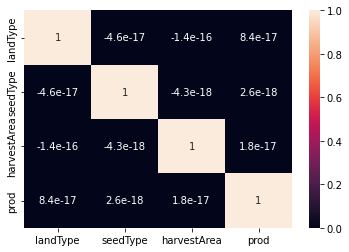

In [106]:
sns.heatmap(df_scaled.corr(),annot=True)

In [107]:
corr = df_scaled.corr();
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False);
corr_df = pd.DataFrame(corr_unstacked[abs(corr_unstacked)>.75]).sort_index()

corr_df

Empty DataFrame
Columns: [0]
Index: []

### Modelling

In [108]:
X = df_scaled.drop(['prod'],axis=1); #dropping the 'class' column or target variable 
y = df_scaled['prod']; #getting the target variable

In [109]:
from sklearn.model_selection import train_test_split #import the library
# stratify will balance the partition of the dataset for training and testing data
#the partition of the datasets are 80 percent in training data and 20 percent in test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)#, shuffle=True

In [110]:
from sklearn.metrics import r2_score;
from sklearn.metrics import mean_absolute_error;
from sklearn.metrics import mean_squared_error;

def evaluateModel(model):
    y_pred = model.predict(X_test);
    print('R^2 Score : ', r2_score(y_test,y_pred));
    print('Mean Absolute Error : ',mean_absolute_error(y_test,y_pred));
    print('RSME : ',np.sqrt(mean_squared_error(y_test,y_pred)))
    
    plt.scatter(y_train, model.predict(X_train),color='g')
    plt.plot(y_pred,y_pred)
    plt.show()

* 3.3.1 GradientBoostingRegressor

R^2 Score :  -0.11215975381943077
Mean Absolute Error :  2.722824541311534
RSME :  3.1246642868434367


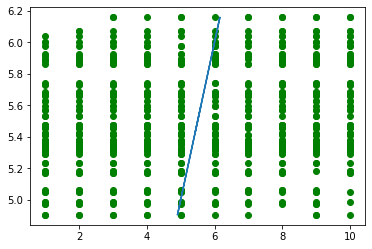

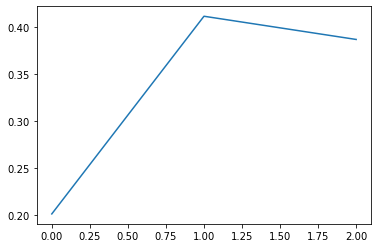

In [111]:
from sklearn.ensemble import GradientBoostingRegressor;

gbr = GradientBoostingRegressor();
gbr.fit(X_train,y_train);
evaluateModel(gbr);
plt.plot(gbr.feature_importances_)

* 3.3.2 Random Forest Regressor

R^2 Score :  -0.1659645838197703
Mean Absolute Error :  2.786735394540327
RSME :  3.1993551740520054


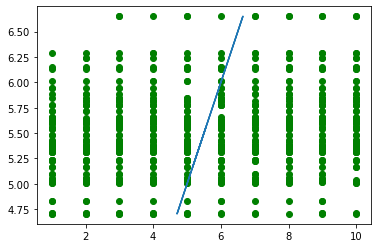

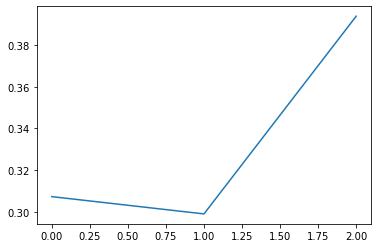

In [112]:
from sklearn.ensemble import RandomForestRegressor;


rf = RandomForestRegressor();
rf.fit(X_train,y_train);
evaluateModel(rf);

plt.plot(rf.feature_importances_)

* 3.3.3 ElasticNet

R^2 Score :  -0.0007910391089736013
Mean Absolute Error :  2.5996296296296295
RSME :  2.964090641888897


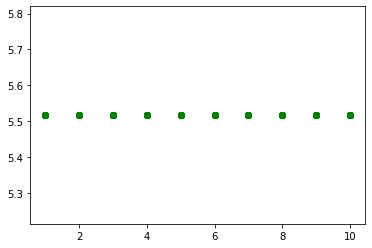

In [113]:
from sklearn.linear_model import ElasticNet;

en = ElasticNet();
en.fit(X_train,y_train);
evaluateModel(en);

* 3.3.4 SGDRegressor

R^2 Score :  -0.012735958563215188
Mean Absolute Error :  2.6193707509574016
RSME :  2.9817270924765813


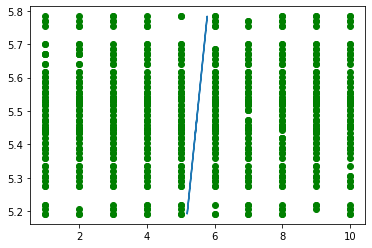

In [114]:
from sklearn.linear_model import SGDRegressor;

sgd = SGDRegressor();
sgd.fit(X_train,y_train);
evaluateModel(sgd);

* 3.3.5 BayesianRidge

R^2 Score :  -0.0008094107996696742
Mean Absolute Error :  2.5996749098125473
RSME :  2.9641178479211407


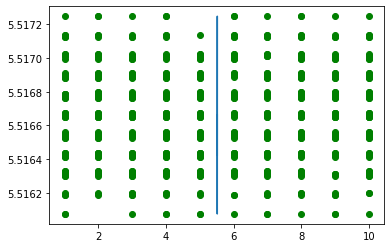

In [115]:
from sklearn.linear_model import BayesianRidge;

br = BayesianRidge();
br.fit(X_train,y_train);
evaluateModel(br);

* 3.3.6 LinearRegression

R^2 Score :  -0.0070625443436089785
Mean Absolute Error :  2.61303019731042
RSME :  2.9733634458226397


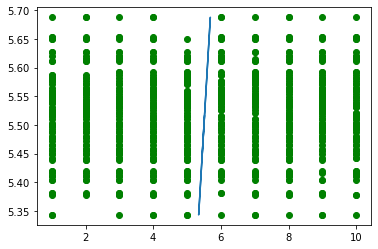

In [116]:
from sklearn.linear_model import LinearRegression;

r = LinearRegression();
r.fit(X_train, y_train);
evaluateModel(r)

* 3.3.7 XGB Regressor

R^2 Score :  -0.16411264156820282
Mean Absolute Error :  2.7838140302234224
RSME :  3.196813340574984


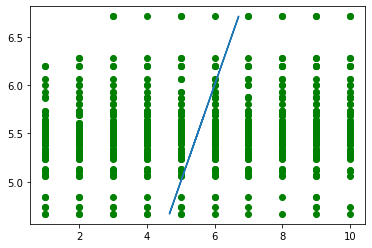

In [117]:
from xgboost import XGBRegressor;

xgb = XGBRegressor()
xgb.fit(X_train, y_train)
evaluateModel(xgb)

* 3.3.8 LGBM Regressor

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 3
[LightGBM] [Info] Start training from score 5.516667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

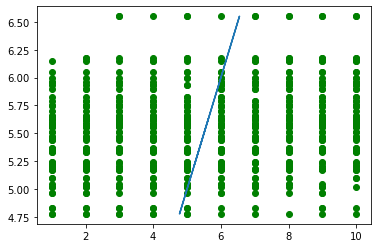

In [118]:
from lightgbm import LGBMRegressor;

lg = LGBMRegressor()
lg.fit(X_train, y_train)
evaluateModel(lg)

R^2 Score :  -0.0069914901658845174
Mean Absolute Error :  2.612896108697629
RSME :  2.9732585498444206


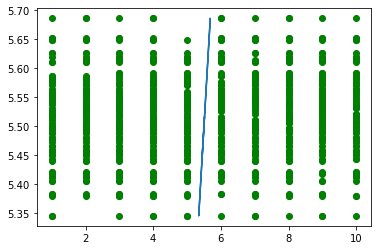

In [119]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

evaluateModel(ridge)

In [167]:
with open('cassavaModel.pkl', 'wb') as f:
    pickle.dump(r, f)
    
with open('cassavaModel.pkl', 'rb') as f:
    cassavamodel = pickle.load(f)

In [168]:
print(cassavamodel)

LinearRegression()


In [169]:
st = seedType_loaded.transform(['Hybrid Seeds'])
print(st)
# ss = seedSystem_loaded.transform(['Formal Seed System'])
# print(ss)
lt = landType_loaded.transform(['Upland'])
print(lt)

[1]
[2]


In [170]:
st = float(st)  # Convert st to a float
lt = float(lt)  # Convert lt to a float
area = float(area)  

In [171]:
area= 5

In [172]:
params = [[st, lt, area]]
pred = cassavamodel.predict(params)
print(pred)

[6.17010293]
